# Evaluation of the Surfeit class

In [1]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from fastautoml.fastautoml import Surfeit
from fastautoml.fastautoml import Inaccuracy

from sklearn.datasets.samples_generator import make_blobs

/home/rleiva/anaconda3/envs/sklearn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
rcParams['figure.figsize'] = 10, 5

### Surfeit and Overfitting

Study how the surfeit of a model changes when we increaset the accuracy of the model.

In this example, we are going to generate a dataset composed of 900 samples of a sinusoidal curve.

In [3]:
n_samples = 900
degrees = np.arange(1, 15)

In [4]:
X = np.sort(np.random.rand(n_samples) * 3)
y = np.cos(1.5 * np.pi * X)

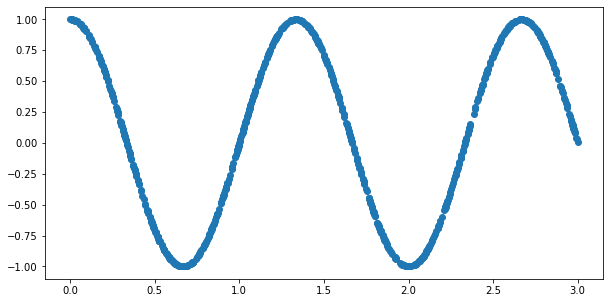

In [5]:
plt.scatter(X, y)

And we will fit the data using an n degree polynomial, where n goes from 1 to 15.

In [6]:
inacc = Inaccuracy(y_type="numeric")
sft   = Surfeit(y_type="numeric")

In [7]:
linacc   = list()
lsurfeit = list()

for i in degrees:
        
    poly = PolynomialFeatures(degree=i, include_bias=False)
    newX = poly.fit_transform(X[:, np.newaxis])
    
    linear_regression = LinearRegression()
    linear_regression.fit(newX, y)

    inacc.fit(newX, y)
    inaccuracy = inacc.inaccuracy_model(linear_regression)
    
    sft.fit(newX, y)
    surfeit = sft.surfeit_model(linear_regression)
    
    linacc.append(inaccuracy)
    lsurfeit.append(surfeit)

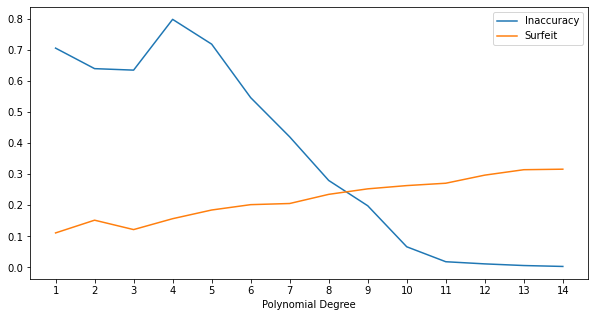

In [8]:
plt.plot(linacc, label="Inaccuracy")
plt.plot(lsurfeit, label="Surfeit")
plt.xlabel("Polynomial Degree")
plt.xticks(degrees-1, degrees)
plt.legend(loc="best")

As it was expected, the higher the degree of the polynomial, the smaller is the error of the model. However, at the same time, we see that the higher the polynomial, the higher the surfeit of the model.

### Decision Tres vs Neural Networks

Let's compare a Decision Tree with a Neural Network.

Create a synthetic dataset composed of two clusters of points. In this case, it is very easy to split them apart.

In [20]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=1, random_state=1)

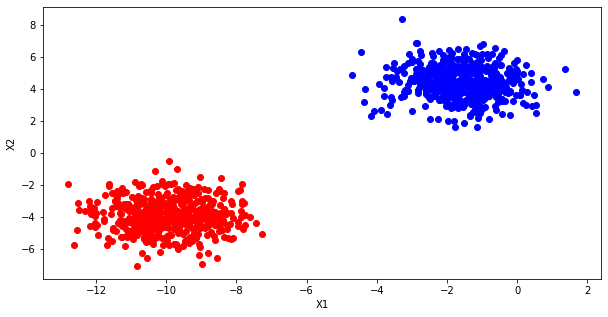

In [21]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

A decision tree has no problem classifying this dataset.

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

A neural network has no problem either.

In [23]:
nn = MLPClassifier()
nn.fit(X, y)
nn.score(X, y)

1.0

But, given that the accuracy is the same, which model should we prefer? Let's compute the surfeit.

In [24]:
sft = Surfeit(y_type="categorical")
sft.fit(X, y)

Surfeit(y_type='categorical')

In [25]:
sft.surfeit_model(tree)

0.25

In [26]:
sft.surfeit_model(nn)

0.7765314926660914

As we can see, the surfeit of a neural network is much higher than the surfeit of the decision tree, and so, we should prefer the decision tree for this particular problem.

Let's now generate a more difficult dataset.

In [27]:
X, y = make_blobs(n_samples=10000, centers=2, n_features=8, cluster_std=3, random_state=1)

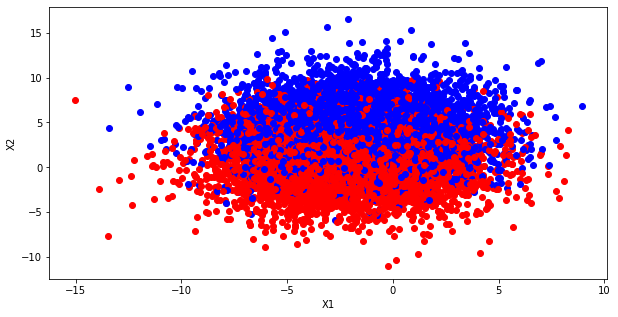

In [17]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In this case, again, both models are able to perfectly classify all the training points.

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

In [29]:
nn = MLPClassifier()
nn.fit(X, y)
nn.score(X, y)

0.9997

In [30]:
sft = Surfeit(y_type="categorical")
sft.fit(X, y)

Surfeit(y_type='categorical')

In [31]:
sft.surfeit_model(tree)

0.8269493844049247

In [32]:
sft.surfeit_model(nn)

0.8237218813905931

However, the surfeit of the decision tree has increased a lot, and it is not clear that it is still the best model.